In [9]:
import pandas as pd
import numpy as np
import random
from dotenv import load_dotenv
load_dotenv(r'.env')
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
data_dir = os.environ.get('DATA_DIR')

In [52]:
data = pd.read_csv(data_dir + "/sign_mnist_train.csv")
data.head(5)
data.columns

Index(['label', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6',
       'pixel7', 'pixel8', 'pixel9',
       ...
       'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779', 'pixel780',
       'pixel781', 'pixel782', 'pixel783', 'pixel784'],
      dtype='object', length=785)

In [4]:
def split_dataset(dataset, split_ratio=0.8):
    """Permet de separer les données en jeux d'entrainement et de validation selon un pourcentage pour le jeu d'entrainement"""

    random.shuffle(dataset)

    split_index = int(len(dataset) * split_ratio)

    train_set = dataset[:split_index]
    validation_set = dataset[split_index:]

    return train_set, validation_set


train_set, validation_set = split_dataset(np.array(data), split_ratio=0.8)

#Division des labels et des données
X_train = train_set[:,1:]
y_train = train_set[::,0]
X_val = validation_set[:,1:]
y_val = validation_set[::,0]

In [8]:
alphabet = "ABCDEFGHIJKLMNOPQRSTUVWXYZ"

In [26]:
train_set

array([[  3, 107, 118, ..., 204, 203, 202],
       [  3, 107, 118, ..., 204, 203, 202],
       [  2, 187, 188, ..., 195, 194, 195],
       ...,
       [  3,  90, 101, ..., 188, 190, 206],
       [  7, 115, 118, ..., 153, 153, 153],
       [ 23, 159, 163, ..., 238, 236, 236]])

D


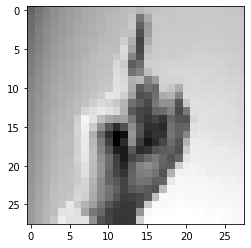

In [29]:
i=0
img = X_train[i,:].reshape(28,28)
print(alphabet[data.loc[i,"label"]])
plt.imshow(img, cmap="gray")
plt.show()

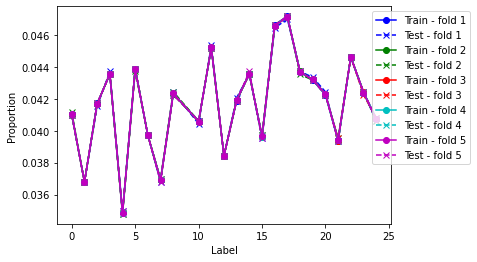

In [19]:
colors= ['b', 'g', 'r', 'c', 'm']
stratkf = StratifiedKFold(n_splits=5)
X = np.array(data.iloc[:,1:])
y = data['label']
for i, (train_index, test_index) in enumerate(stratkf.split(X, y), 1):
    train_fold = y.iloc[train_index]
    test_fold = y.iloc[test_index]
    
    train_proportions = train_fold.value_counts(normalize=True).sort_index()
    plt.plot(train_proportions, label= f"Train - fold {i}", color= colors[i-1], marker='o')
    
    test_proportions = test_fold.value_counts(normalize=True).sort_index()
    plt.plot(test_proportions, label= f"Test - fold {i}", linestyle='dashed',  color= colors[i-1], marker='x')
    
plt.xlabel('Label')
plt.ylabel('Proportion')
plt.legend(loc='upper right', bbox_to_anchor=(1.25,1))
plt.show()
